In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split

In [2]:
csv_data = "./helper files/housing.csv"
housing_df = pd.read_csv(csv_data)

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preparation

In [3]:
features_to_use = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                  'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'
                  ]
housing_df = housing_df[features_to_use]

housing_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
housing_df = housing_df.fillna(0)
housing_df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']

In [6]:
housing_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

# Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:
- `NEAR BAY`
- `<1H OCEAN`
- `INLAND`
- `NEAR OCEAN`

In [7]:
ocean_proximity_mode = housing_df['ocean_proximity'].mode().values

print(f"The most frequent observation (mode) for the column: 'ocean_proximity' is {ocean_proximity_mode}")

The most frequent observation (mode) for the column: 'ocean_proximity' is ['<1H OCEAN']


# Question 2

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?


Options:
- `total_bedrooms` and `households`
- `total_bedrooms` and `total_rooms`
- `population` and `households`
- `population_per_household` and `total_rooms`

In [8]:
corr_matrix = housing_df.corr()
corr_matrix

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


<AxesSubplot:>

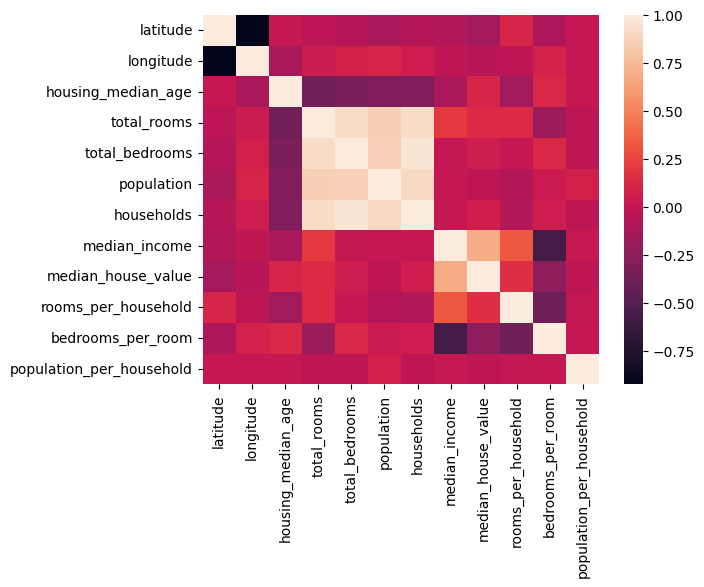

In [9]:
sn.heatmap(corr_matrix)

In [10]:
print(corr_matrix['total_bedrooms']['households'])
print(corr_matrix['total_bedrooms']['total_rooms'])
print(corr_matrix['population']['households'])
print(corr_matrix['population_per_household']['total_rooms'])

0.966507240042043
0.9201961721166215
0.9072222660959659
-0.02458065899398796


# Make `median_house_value` binary

- We need to turn the `median_house_value` variable from numeric into binary.
- Let's create a variable `above_average` which is 1 if the `median_house_value` is above its mean value and 0 otherwise.

In [11]:
mean_house_value = housing_df['median_house_value'].mean()
housing_df['above_average'] = (housing_df['median_house_value'] > mean_house_value).astype(int)

housing_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'above_average'],
      dtype='object')

# Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [32]:
full_train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [29]:
train_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [30]:
val_df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [33]:
y_train = train_df['above_average'].values
y_val = val_df['above_average'].values
y_test = test_df['above_average'].values

del train_df['median_house_value']
del val_df['median_house_value']
del test_df['median_house_value']

del train_df['above_average']
del val_df['above_average']
del test_df['above_average']

# Question 3

- Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
- Round it to 2 decimals using round(score, 2)

What is their mutual information score?

Options:
- 0.26
- 0
- 0.10
- 0.16

In [35]:
from sklearn.metrics import mutual_info_score

avg_ocean_mutual_score = mutual_info_score(y_train, train_df.ocean_proximity).round(2)
avg_ocean_mutual_score

0.1

# Question 4

Now let's train a logistic regression
> Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.

- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

## One-Hot Encoding

In [15]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [64]:
dict_train = train_df.to_dict(orient='records')
dv.fit(dict_train)
X_train = dv.transform(dict_train)    # perform one hot encooding on the categorical data

dict_val = val_df.to_dict(orient='records')
X_val = dv.fit_transform(dict_val)    # combining the fit and trasform in one single method

dict_test = test_df.to_dict(orient='records')
X_test = dv.fit_transform(dict_test)

## Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [53]:
y_pred = model.predict(X_val)    # Hard prediction

# But we need soft prediction for making a decision

y_pred = model.predict_proba(X_val)    # Probability of False, Probability of True
y_pred = y_pred[:, 1]

In [57]:
above_average_value = y_pred >= 0.5

In [63]:
accuracy = (y_val == above_average_value).mean().round(2)
accuracy

0.84

# Question 5

Let's find the least useful feature using the feature elimination technique.

- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.


Which of following feature has the smallest difference?
- total_rooms
- total_bedrooms
- population
- households

In [97]:
base_accuracy = accuracy

print(f"The original accuracy of the model is {base_accuracy}")

base_features = list(train_df.columns.values)
base_features

The original accuracy of the model is 0.84


['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

## Training the model with all features

In [108]:
def train_logistic_regression_without_feature(exclude: str=None) -> tuple[str, int, int]:
    features_to_use = base_features.copy()
    features_to_use.remove(exclude)
    
    train_df_exc = train_df[features_to_use]
    val_df_exc = val_df[features_to_use]
    
    
    # Getting the X matrix for the training
    train_dict_exc = train_df_exc.to_dict(orient='records')
    X_train_exc = dv.fit_transform(train_dict_exc)
    
    print(dv.get_feature_names_out())
    
    val_dict_exc = val_df_exc.to_dict(orient='records')
    X_val_exc = dv.fit_transform(val_dict_exc)
    
    # Training the model using Logistic Regression
    model.fit(X_train_exc, y_train)
    y_pred_exc = model.predict_proba(X_val_exc)[:, 1]
    
    # Getting the accuracy
    above_avg_pred = y_pred_exc >= 0.5
    accuracy_exc = (y_val - above_avg_pred).mean()
    
    returned =  {
        'feature': exclude,
        'accuracy': accuracy_exc,
        'diff': (base_accuracy - accuracy_exc).round(2)
    }
    
    print(f"Returned value: {returned}")
    print('\n\n')
    
    return {
        'feature': exclude,
        'accuracy': accuracy_exc,
        'diff': (base_accuracy - accuracy_exc).round(2)
    }   

In [109]:
accuracy_per_feature = []

for feature in base_features:
    print(f"Feature: {feature}")
    accuracy_per_feature.append(train_logistic_regression_without_feature(exclude=feature))
    
accuracy_per_feature

Feature: latitude
['bedrooms_per_room' 'households' 'housing_median_age' 'longitude'
 'median_income' 'ocean_proximity=<1H OCEAN' 'ocean_proximity=INLAND'
 'ocean_proximity=ISLAND' 'ocean_proximity=NEAR BAY'
 'ocean_proximity=NEAR OCEAN' 'population' 'population_per_household'
 'rooms_per_household' 'total_bedrooms' 'total_rooms']
Returned value: {'feature': 'latitude', 'accuracy': 0.001695736434108527, 'diff': 0.84}



Feature: longitude
['bedrooms_per_room' 'households' 'housing_median_age' 'latitude'
 'median_income' 'ocean_proximity=<1H OCEAN' 'ocean_proximity=INLAND'
 'ocean_proximity=ISLAND' 'ocean_proximity=NEAR BAY'
 'ocean_proximity=NEAR OCEAN' 'population' 'population_per_household'
 'rooms_per_household' 'total_bedrooms' 'total_rooms']
Returned value: {'feature': 'longitude', 'accuracy': 0.00024224806201550387, 'diff': 0.84}



Feature: housing_median_age
['bedrooms_per_room' 'households' 'latitude' 'longitude' 'median_income'
 'ocean_proximity=<1H OCEAN' 'ocean_proximity=IN

[{'feature': 'latitude', 'accuracy': 0.001695736434108527, 'diff': 0.84},
 {'feature': 'longitude', 'accuracy': 0.00024224806201550387, 'diff': 0.84},
 {'feature': 'housing_median_age',
  'accuracy': 0.0048449612403100775,
  'diff': 0.84},
 {'feature': 'total_rooms', 'accuracy': 0.002180232558139535, 'diff': 0.84},
 {'feature': 'total_bedrooms', 'accuracy': 0.003875968992248062, 'diff': 0.84},
 {'feature': 'population', 'accuracy': 0.0075096899224806205, 'diff': 0.83},
 {'feature': 'households', 'accuracy': 0.005329457364341085, 'diff': 0.83},
 {'feature': 'median_income', 'accuracy': -0.03875968992248062, 'diff': 0.88},
 {'feature': 'ocean_proximity',
  'accuracy': 0.028585271317829456,
  'diff': 0.81},
 {'feature': 'rooms_per_household',
  'accuracy': 0.0031492248062015503,
  'diff': 0.84},
 {'feature': 'bedrooms_per_room',
  'accuracy': 0.001937984496124031,
  'diff': 0.84},
 {'feature': 'population_per_household',
  'accuracy': 0.0024224806201550387,
  'diff': 0.84}]

# Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [113]:
full_train_df_lr, test_df_lr = train_test_split(housing_df, test_size=0.2, random_state=42)
train_df_lr, val_df_lr = train_test_split(full_train_df, test_size=0.25, random_state=42)

train_df_lr = train_df_lr.reset_index(drop=True)
val_df_lr = val_df_lr.reset_index(drop=True)
test_df_lr = test_df_lr.reset_index(drop=True)

y_train_lr = np.log1p(train_df_lr['median_house_value'].values)
y_val_lr = np.log1p(val_df_lr['median_house_value'].values)
y_test_lr = np.log1p(test_df_lr['median_house_value'].values)

del train_df_lr['median_house_value']
del val_df_lr['median_house_value']
del test_df_lr['median_house_value']

In [ ]:
from sklearn.linear_model import Ridge

for a in  [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    train_dict_lr = train_df_lr.to_dict(orient='records')
    X_train_lr = dv.fit_transform(train_dict_lr)
    
    print(dv.get_feature_names_out())
    
    val_dict_lr = val_df_lr.to_dict(orient='records')
    X_val_lr = dv.fit_transform(val_dict_lr)
    
    model.fit(X_train_lr, y_train_lr)
    
    predict = model.predict(X_val_lr)
    